In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename="housepricedata.csv"
df = pd.read_csv(filename)
print(df.shape)
df

(1460, 11)


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
options = df["Fireplaces"].describe()
print(options)

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


In [4]:
input_cols2 = list(df.columns)
output_cols2 = ["AboveMedianPrice"]

def dataframe_to_arrays2(dataframe):
    dataframe1 = dataframe.copy(deep=True)
    inputs_array = dataframe1[input_cols2].to_numpy()
    targets_array = dataframe1[output_cols2].to_numpy()
    return inputs_array, targets_array

X,Y = dataframe_to_arrays2(df)
print(X.shape)
print(Y.shape)

(1460, 11)
(1460, 1)


In [5]:
def normalize_X(data):
    mean = np.mean(data, axis=0, keepdims=True)
    #print(mean.shape)
    std = np.std(data, axis=0, keepdims=True)
    normalized_data = (data - mean)/std
    return normalized_data
print(Y.shape)
X=normalize_X(X)
shuffler = np.random.permutation(X.shape[0]) #shuffling dataset
X = X[shuffler]
Y = Y[shuffler]
print(X.shape)
print(Y.shape)
X_test=X[int(X.shape[0]*0.9):,:X.shape[1]-1].T
Y_test=Y[int(Y.shape[0]*0.9):,:].T
X=X[:int(X.shape[0]*0.9),:]
Y=Y[:int(Y.shape[0]*0.9),:]
X_train=X[:int(X.shape[0]*0.8),:X.shape[1]-1].T      #0.8 to obtain 80:20 train:test ratio
Y_train=Y[:int(Y.shape[0]*0.8),:].T
X_val=X[int(X.shape[0]*0.8):,:X.shape[1]-1].T
Y_val=Y[int(Y.shape[0]*0.8):,:].T


#X=X_train
#Y=Y_train
print(X_val.shape,Y_val.shape,X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1460, 1)
(1460, 11)
(1460, 1)
(10, 263) (1, 263) (10, 1051) (1, 1051) (10, 146) (1, 146)


In [6]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)    # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [8]:

def L_model_forward(X, parameters):


    caches = {}
    A = X
    L = len(parameters) //2
    
    # Implement [LINEAR -> TANH]*(L-1) i.e. for L-1 layers .. and finally LINEAR->SIGMOID
    for l in range(1, L):
        A_prev = A 
        Zl=np.dot(parameters["W"+str(l)],A_prev) + parameters["b"+str(l)]
        A=np.tanh(Zl)
        caches["Z"+str(l)]=Zl
        caches["A"+str(l)]=A
    
    # Implement LINEAR -> SIGMOID.
    Zl=np.dot(parameters["W"+str(L)],A) + parameters["b"+str(L)]
    AL=sigmoid(Zl)
    caches["Z"+str(L)]=Zl
    caches["A"+str(L)]=AL
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches



In [9]:
def compute_cost(A2, Y, parameters):

    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
    assert(isinstance(cost, float))
    
    return cost

In [10]:

def L_model_backward(AL,X, Y, caches,parameters):
    grads={}
    L = len(parameters) // 2 
    m = AL.shape[1] 
    Y = Y.reshape(AL.shape) 
    dZL=AL-Y
    for i in range(L,1,-1):
      grads["dW"+str(i)]=(1/m)*np.dot(dZL,caches["A"+str(i-1)].T)
      grads["db"+str(i)]=(1/m)*(np.sum(dZL,axis=1,keepdims=True))
      dZL=np.dot(parameters["W"+str(i)].T,dZL)*(1-np.power(caches["A"+str(i-1)],2))
    grads["dW1"]=(1/m)*(np.dot(dZL,X.T))
    grads["db1"]=(1/m)*(np.sum(dZL,axis=1,keepdims=True))
    return grads



In [11]:
def update_parameters(parameters, grads, learning_rate):

    
    L = len(parameters)//2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters


In [ ]:
def nn_model(X, Y, layers_dims, learning_rate, num_iterations = 1000, print_cost=False):
    n_x=X.shape[0]
    n_y=Y.shape[0]

    parameters = initialize_parameters_deep(layers_dims)
    costs=[]
    for i in range(0, num_iterations):
        # Forward propagation
        AL, cache = L_model_forward(X, parameters)
        # Cost
        cost = compute_cost(AL, Y, parameters)
        # Backpropagation
        grads = L_model_backward(AL,X, Y, cache,parameters)
        # Update 
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if(i%10==0):
            costs.append(cost)
        
    # Returns parameters learnt by the model
    return parameters,costs

In [12]:
layers=[X_train.shape[0],32,64,128,256,1]

In [ ]:

parameters,cost = nn_model(X_train, Y_train, layers,1.2,num_iterations=1000, print_cost=True)

Cost after iteration 0: 0.680616
Cost after iteration 100: 0.160500
Cost after iteration 200: 0.133778
Cost after iteration 300: 0.045415
Cost after iteration 400: 0.074333
Cost after iteration 500: 0.012121
Cost after iteration 600: 0.007943
Cost after iteration 700: 0.006777
Cost after iteration 800: 0.006196
Cost after iteration 900: 0.005814


In [13]:
def predict(parameters, X):
    AL, cache = L_model_forward(X, parameters)
    predictions = (AL > 0.5)
    
    return predictions

In [ ]:
predictions_train = predict(parameters, X_train)
predictions_test = predict(parameters, X_val)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train.T) + np.dot(1-Y_train,1-predictions_train.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy: %d' % float((np.dot(Y_val,predictions_test.T) + np.dot(1-Y_val,1-predictions_test.T))/float(Y_val.size)*100) + '%')

Train Accuracy: 99%
Validation Accuracy: 90%


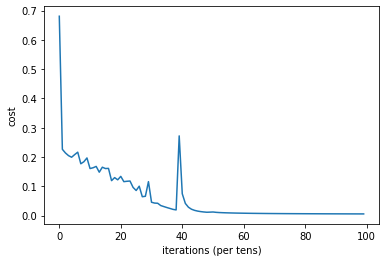

In [ ]:
costs = np.squeeze(cost)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [14]:
def initialize_velocity(parameters):

    
    L = len(parameters) // 2
    v = {}
    
    # Initialize velocity
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        
    return v

In [15]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):

    L = len(parameters) // 2 
    
    # Momentum update
    for l in range(L):
        # compute velocities
        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1 - beta)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1 - beta)*grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]
        
    return parameters, v

In [16]:
import math
def initialize_parameters_he(layers_dims):

    L=len(layers_dims)
    parameters = {}

    for i in range(1,L):
      parameters["W"+str(i)]=np.random.randn(layers_dims[i],layers_dims[i-1])*math.sqrt(2./layers_dims[i-1])
      parameters["b"+str(i)]=np.zeros((layers_dims[i],1))*math.sqrt(2./layers_dims[i-1])
        
    return parameters

In [17]:
def nn_model_with_momentum(X, Y, X_test,Y_test,layers_dims, beta,learning_rate, k,num_iterations = 1000, print_cost=False):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    # parameters = initialize_parameters_deep(layers_dims)
    parameters = initialize_parameters_he(layers_dims)
    costs1=[]
    costs2=[]
    v = initialize_velocity(parameters)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters)
        A_test, cache_test = L_model_forward(X_test, parameters)
        cost1 = compute_cost(AL, Y, parameters)
        cost2=compute_cost(A_test,Y_test,parameters)
        grads = L_model_backward(AL,X, Y, cache,parameters)
        parameters,v = update_parameters_with_momentum(parameters, grads, v,beta,learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost1))
        if(i%10==0):
            costs1.append(cost1)
            costs2.append(cost2)
        if(i!=0 and i%15==0):
          learning_rate=learning_rate*k
    return parameters,costs1,costs2

In [ ]:
parameters_with_momentum,cost_with_momentum1,cost_with_momentum2 = nn_model_with_momentum(X_train, Y_train, X_val,Y_val,layers,0.8,0.1,1,num_iterations=2000, print_cost=True)

Cost after iteration 0: 0.746894
Cost after iteration 100: 0.215766
Cost after iteration 200: 0.189080
Cost after iteration 300: 0.163668
Cost after iteration 400: 0.139658
Cost after iteration 500: 0.118170
Cost after iteration 600: 0.099049
Cost after iteration 700: 0.082134
Cost after iteration 800: 0.067682
Cost after iteration 900: 0.055796
Cost after iteration 1000: 0.046222
Cost after iteration 1100: 0.038569
Cost after iteration 1200: 0.032461
Cost after iteration 1300: 0.027585
Cost after iteration 1400: 0.023687
Cost after iteration 1500: 0.020565
Cost after iteration 1600: 0.018058
Cost after iteration 1700: 0.016039
Cost after iteration 1800: 0.014406
Cost after iteration 1900: 0.013078


In [ ]:
predictions_train_momentum = predict(parameters_with_momentum, X_train)
predictions_test_momentum = predict(parameters_with_momentum, X_val)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train_momentum.T) + np.dot(1-Y_train,1-predictions_train_momentum.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy: %d' % float((np.dot(Y_val,predictions_test_momentum.T) + np.dot(1-Y_val,1-predictions_test_momentum.T))/float(Y_val.size)*100) + '%')

Train Accuracy: 99%
Validation Accuracy: 89%


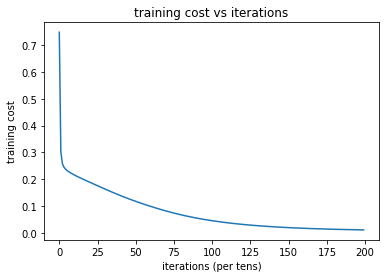

In [ ]:
t1 = np.squeeze(cost_with_momentum1)
plt.plot(t1)
plt.ylabel('training cost')
plt.xlabel('iterations (per tens)')
plt.title("training cost vs iterations")
plt.show()


[0.7408195030846872, 0.28203463622423053, 0.23512038026374432, 0.22854673599958478, 0.22361155315692297, 0.22141081080037456, 0.21956233857848154, 0.21822920726347808, 0.217276986752596, 0.21660605989381496, 0.2161517217466802, 0.21585956580950919, 0.21569509839453455, 0.2156322648427368, 0.21565281242782114, 0.2157434629075075, 0.21589479424751037, 0.2161002029670817, 0.21635516059875973, 0.21665666889633012, 0.21700282975558258, 0.21739252360425063, 0.21782516890732326, 0.21830054811691224, 0.21881868391332965, 0.21937975207955002, 0.2199840199268461, 0.22063180213956968, 0.22132342839606428, 0.22205921901773196, 0.22283946627853515, 0.2236644199921133, 0.2245342766609646, 0.22544917184932697, 0.2264091755593691, 0.2274142903088283, 0.2284644514197593, 0.22955952883630784, 0.23069932967936277, 0.23188360076103007, 0.23311203041835724, 0.2343842492461698, 0.23569982956602714, 0.23705828372499538, 0.23845906155687027, 0.23990154755759077, 0.24138505852322387, 0.24290884256001333, 0.244

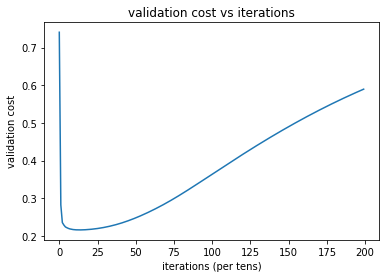

In [ ]:
print(cost_with_momentum2)
t2 = np.squeeze(cost_with_momentum2)
plt.plot(t2)
plt.ylabel('validation cost')
plt.xlabel('iterations (per tens)')
plt.title("validation cost vs iterations")
plt.show()

In [ ]:
learning=[0.01,0.02,0.06,0.1,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.4,2.8,3.2,3.6,4]
acc1=[]
acc2=[]
for l in learning:
  parameters_with_momentum,cost_with_momentum1,cost_with_momentum2 = nn_model_with_momentum(X_train, Y_train, X_val,Y_val,layers,0.8,l,1,num_iterations=2000, print_cost=False)
  predictions_test_momentum = predict(parameters_with_momentum, X_val)
  predictions_train_momentum = predict(parameters_with_momentum, X_train)
  acc1.append(float((np.dot(Y_val,predictions_test_momentum.T) + np.dot(1-Y_val,1-predictions_test_momentum.T))/float(Y_val.size)*100))
  acc2.append(float((np.dot(Y_train,predictions_train_momentum.T) + np.dot(1-Y_train,1-predictions_train_momentum.T))/float(Y_train.size)*100))
print(acc1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


[90.49429657794677, 91.63498098859316, 91.63498098859316, 90.8745247148289, 89.35361216730038, 90.11406844106465, 90.49429657794677, 88.59315589353612, 87.83269961977186, 88.97338403041825, 88.59315589353612, 89.35361216730038, 89.35361216730038, 88.59315589353612, 90.49429657794677, 90.49429657794677, 87.83269961977186, 86.69201520912547, 89.73384030418251]


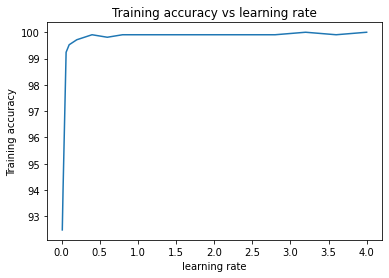

In [ ]:
plt.plot(learning,acc2)
plt.ylabel('Training accuracy')
plt.xlabel('learning rate')
plt.title("Training accuracy vs learning rate")
plt.show()

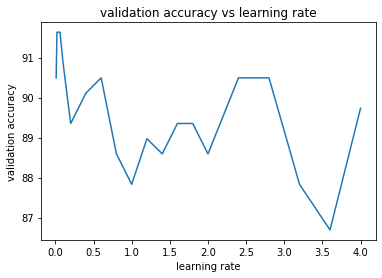

In [ ]:
plt.plot(learning,acc1)
plt.ylabel('validation accuracy')
plt.xlabel('learning rate')
plt.title("validation accuracy vs learning rate")
plt.show()

Used initial learning rate with max accuracy above

In [ ]:
learning_rate_update=[0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.98,0.99,0.999]
acc3=[]
for k in learning_rate_update:
  parameters_with_momentum,cost_with_momentum1,cost_with_momentum2 = nn_model_with_momentum(X_train, Y_train, X_val,Y_val,layers,0.8,1.2,k,num_iterations=2000, print_cost=False)
  predictions_test_momentum = predict(parameters_with_momentum, X_val)
  acc3.append(float((np.dot(Y_val,predictions_test_momentum.T) + np.dot(1-Y_val,1-predictions_test_momentum.T))/float(Y_val.size)*100))
print(acc3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


[90.49429657794677, 90.49429657794677, 90.11406844106465, 91.25475285171103, 92.01520912547528, 92.01520912547528, 90.49429657794677, 90.49429657794677, 89.73384030418251, 89.73384030418251, 86.69201520912547]


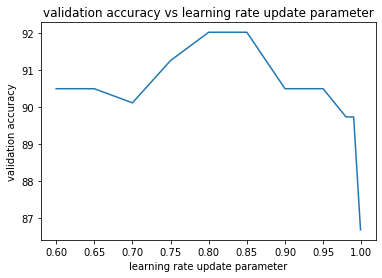

In [ ]:
plt.plot(learning_rate_update,acc3)
plt.ylabel('validation accuracy')
plt.xlabel('learning rate update parameter')
plt.title("validation accuracy vs learning rate update parameter")
plt.show()

In [18]:
def L_model_forward_with_dropout(X, parameters,keep_prob):


    caches = {}
    A = X
    L = len(parameters)//2
    
    # Implement LINEAR -> TANH
    for l in range(1, L):
        
        Zl=np.dot(parameters["W"+str(l)],A) + parameters["b"+str(l)]
    
        
        Al=np.tanh(Zl)
        Dl=np.random.rand(Al.shape[0],Al.shape[1])
        Dl=(Dl<keep_prob).astype(int)
        Al=Al*Dl
        Al=Al/keep_prob
        caches["Z"+str(l)]=Zl
        caches["A"+str(l)]=Al
        caches["D"+str(l)]=Dl
        A=Al

    Zl=np.dot(parameters["W"+str(L)],A) + parameters["b"+str(L)]
    AL=sigmoid(Zl)
    caches["Z"+str(L)]=Zl
    caches["A"+str(L)]=AL
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


In [19]:
def L_model_backward_with_dropout(AL,X, Y, caches,parameters,keep_prob):

    grads={}
    L = len(parameters) // 2 
    m = X.shape[1] 
    #Y = Y.reshape(AL.shape) 
    dZL=AL-Y
    for i in range(L,1,-1):
      dWl=(1./m)*np.dot(dZL,caches["A"+str(i-1)].T)
      dbl=(1./m)*(np.sum(dZL,axis=1,keepdims=True))
      dAl=np.dot(parameters["W"+str(i)].T,dZL)
      dAl=dAl*caches["D"+str(i-1)]
      dAl=dAl/keep_prob
      grads["dW"+str(i)]=dWl
      grads["db"+str(i)]=dbl
      grads["dZ"+str(i)]=dZL
      dZL=np.multiply(dAl,(1-np.power(caches["A"+str(i-1)],2)))
      #dZL=np.multiply(dAl,np.int64(caches["A"+str(i-1)] > 0))
    grads["dW1"]=(1./m)*(np.dot(dZL,X.T))
    grads["db1"]=(1./m)*(np.sum(dZL,axis=1,keepdims=True))
    grads["dZ1"]=dZL
    return grads


In [20]:
def nn_model_with_momentum_with_dropout(X, Y, X_test,Y_test,layers_dims, beta,learning_rate, num_iterations = 1000, print_cost=False, keep_prob = 0.9):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    # parameters = initialize_parameters_deep(layers_dims)
    parameters = initialize_parameters_he(layers_dims)
    costs1=[]
    costs2=[]
    v = initialize_velocity(parameters)
    for i in range(0, num_iterations):
        AL, cache =L_model_forward_with_dropout(X, parameters,keep_prob)
        A_test, cache_test = L_model_forward_with_dropout(X_test, parameters,keep_prob)
        cost1 = compute_cost(AL, Y, parameters)
        cost2=compute_cost(A_test,Y_test,parameters)
        grads = L_model_backward_with_dropout(AL,X, Y, cache,parameters,keep_prob)
        parameters,v = update_parameters_with_momentum(parameters, grads, v,beta,learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost1))
        if(i%10==0):
            costs1.append(cost1)
            costs2.append(cost2)
    return parameters,costs1,costs2

In [ ]:
parameters_with_momentum_with_dropout,cost_with_momentum1_with_dropout,cost_with_momentum2_with_dropout = nn_model_with_momentum_with_dropout(X_train, Y_train, X_val,Y_val,layers,0.8,0.4,num_iterations=6000, print_cost=True)

Cost after iteration 0: 1.047836
Cost after iteration 1000: 0.102116
Cost after iteration 2000: 0.049827
Cost after iteration 3000: 0.042262
Cost after iteration 4000: 0.037026
Cost after iteration 5000: 0.020193


In [ ]:
predictions_train_momentum_with_dropout = predict(parameters_with_momentum_with_dropout, X_train)
predictions_test_momentum_with_dropout = predict(parameters_with_momentum_with_dropout, X_val)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train_momentum_with_dropout.T) + np.dot(1-Y_train,1-predictions_train_momentum_with_dropout.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy: %d' % float((np.dot(Y_val,predictions_test_momentum_with_dropout.T) + np.dot(1-Y_val,1-predictions_test_momentum_with_dropout.T))/float(Y_val.size)*100) + '%')

Train Accuracy: 99%
Validation Accuracy: 88%


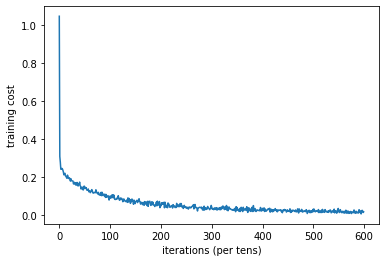

In [ ]:
t3 = np.squeeze(cost_with_momentum1_with_dropout)
plt.plot(t3)
plt.ylabel('training cost')
plt.xlabel('iterations (per tens)')
plt.show()

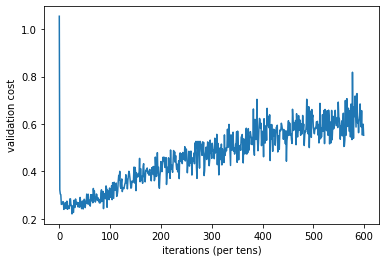

In [ ]:
#print(cost_with_momentum2)
t4 = np.squeeze(cost_with_momentum2_with_dropout)
plt.plot(t4)
plt.ylabel('validation cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [ ]:
predictions_val = predict(parameters_with_momentum_with_dropout, X_test)
print ('Final test Accuracy: %d' % float((np.dot(Y_test,predictions_val.T) + np.dot(1-Y_test,1-predictions_val.T))/float(Y_test.size)*100) + '%')

Final test Accuracy: 90%


Confusion matrix

In [ ]:
n11=0
n12=0
n21=0
n22=0
for i in range(Y_val.shape[1]):
  if(Y_val[0,i]==0 and predictions_test_momentum_with_dropout[0,i]==False):
    n11+=1
  elif(Y_val[0,i]==0 and predictions_test_momentum_with_dropout[0,i]==True):
    n12+=1
  elif(Y_val[0,i]==1 and predictions_test_momentum_with_dropout[0,i]==False):
    n21+=1
  else:
    n22+=1
print("n11: "+str(n11))
print("n12: "+str(n12))
print("n21: "+str(n21))
print("n22: "+str(n22))

n11: 109
n12: 17
n21: 14
n22: 123


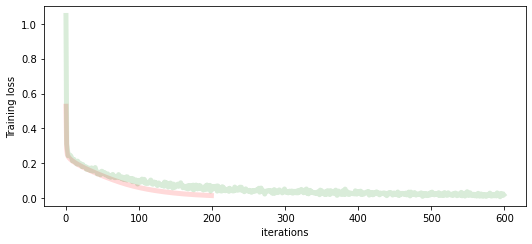

In [ ]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150
line1 = plt.plot(t1, c='red', alpha=overlapping, lw=5)
line2 = plt.plot(t3, c='green', alpha=overlapping,
lw=5)
plt.xlabel("iterations")
plt.ylabel("Training loss")
plt.show()

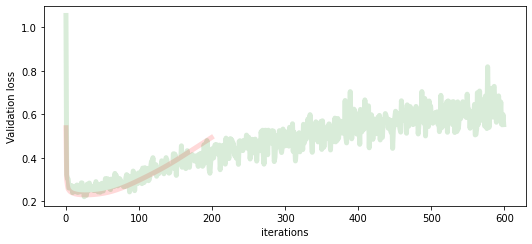

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150
line1 = plt.plot(t2, color='r', alpha=overlapping, lw=5)
line2 = plt.plot(t4, color='g', alpha=overlapping,
lw=5)
plt.xlabel("iterations")
plt.ylabel("Validation loss")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


[91.25475285171103, 91.63498098859316, 87.83269961977186, 89.73384030418251, 85.17110266159695, 86.31178707224335, 88.212927756654, 88.212927756654]


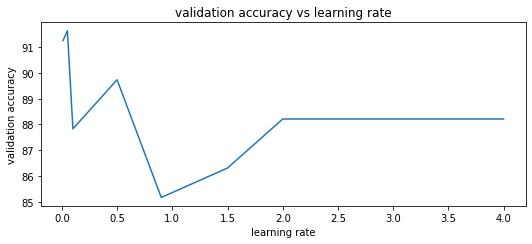

In [ ]:
learning=[0.01,0.05,0.1,0.5,0.9,1.5,2,4]
acc=[]
for l in learning:
  parameters_with_momentum_with_dropout,cost_with_momentum1_with_dropout,cost_with_momentum2_with_dropout = nn_model_with_momentum_with_dropout(X_train, Y_train, X_val,Y_val,layers,0.8,l,num_iterations=2000, print_cost=False)
  predictions_test_momentum_with_dropout = predict(parameters_with_momentum_with_dropout, X_val)
  acc.append(float((np.dot(Y_val,predictions_test_momentum_with_dropout.T) + np.dot(1-Y_val,1-predictions_test_momentum_with_dropout.T))/float(Y_val.size)*100))
print(acc)
plt.plot(learning,acc)
plt.ylabel('validation accuracy')
plt.xlabel('learning rate')
plt.title("validation accuracy vs learning rate")
plt.show()

In [21]:

def compute_cost_with_l2regularization(AL, Y, parameters, lambd):
    m = Y.shape[1]
    L=len(parameters)//2
    cross_entropy_cost = compute_cost(AL, Y,parameters) 
    s1=0
    for i in range(1,L+1):
      s1+=np.sum(np.square(parameters["W"+str(i)]))
    L2_regularization_cost = lambd/(2*m)*(s1)
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [22]:
def backward_propagation_with_l2regularization(X, Y, AL,cache, parameters,lambd):
    
    m = X.shape[1]
    L=len(parameters)//2
    grads={}
    dZL=AL-Y
    for i in range(L,1,-1):
      dWi=(1./m)*np.dot(dZL,cache["A"+str(i-1)].T)+ (lambd/m)*parameters["W"+str(i)]
      dbi=(1./m)*(np.sum(dZL,axis=1,keepdims=True))
      dAi=np.dot(parameters["W"+str(i)].T,dZL)
      grads["dW"+str(i)]=dWi
      grads["db"+str(i)]=dbi
      grads["dZ"+str(i)]=dZL
      grads["dA"+str(i-1)]=dAi
      dZL=np.multiply(dAi,np.int64(cache["A"+str(i-1)]>0))
    dW1=(1./m)*np.dot(dZL,X.T)+ (lambd/m)*parameters["W1"]
    db1 = 1./m * np.sum(dZL, axis=1, keepdims = True)
    grads["dW1"]=dW1
    grads["db1"]=db1
    grads["dZ1"]=dZL
 
    return grads

In [23]:
def nn_model_with_momentum_l2regularization(X, Y, X_test,Y_test,layers_dims, beta,lambd,learning_rate, num_iterations = 1000, print_cost=False):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    # parameters = initialize_parameters_deep(layers_dims)
    parameters = initialize_parameters_he(layers_dims)
    costs1=[]
    costs2=[]
    v = initialize_velocity(parameters)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters)
        A_test, cache_test = L_model_forward(X_test, parameters)
        cost1 = compute_cost_with_l2regularization(AL, Y, parameters,lambd)
        cost2=compute_cost_with_l2regularization(A_test,Y_test,parameters,lambd)
        grads = backward_propagation_with_l2regularization(X, Y, AL,cache, parameters,lambd)
        parameters,v = update_parameters_with_momentum(parameters, grads, v,beta,learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost1))
        if(i%10==0):
            costs1.append(cost1)
            costs2.append(cost2)
    return parameters,costs1,costs2

In [ ]:
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,layers,0.8,3,0.1,num_iterations=500, print_cost=True)

Cost after iteration 0: 1.967875
Cost after iteration 100: 1.546330
Cost after iteration 200: 1.471459
Cost after iteration 300: 1.409023
Cost after iteration 400: 1.358318


In [ ]:
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy: %d' % float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100) + '%')

Train Accuracy: 90%
Validation Accuracy: 90%


In [ ]:
lambda_l2=[0.01,0.09,0.13,0.89,1.5,2.7,6,10,20,50,100]
acc_l2=[]
for l2 in lambda_l2:
  parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,layers,0.8,l2,0.1,num_iterations=2000, print_cost=False)
  predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
  acc_l2.append(float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100))
print(acc_l2)

[88.59315589353612, 87.83269961977186, 90.11406844106465, 87.83269961977186, 87.07224334600761, 87.83269961977186, 82.12927756653993, 88.212927756654, 89.35361216730038, 91.25475285171103, 90.11406844106465]


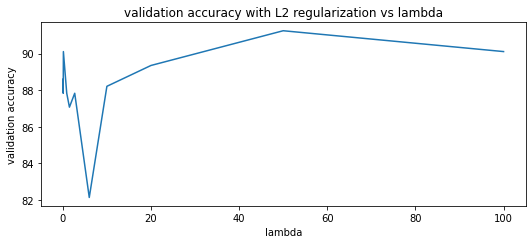

In [ ]:
plt.plot(lambda_l2,acc_l2)
plt.ylabel('validation accuracy')
plt.xlabel('lambda')
plt.title("validation accuracy with L2 regularization vs lambda")
plt.show()

In [ ]:
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,18,4,1],0.8,0.13,0.1,num_iterations=2000, print_cost=True)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Test Accuracy: %d' % float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100) + '%')


Cost after iteration 0: 0.709616
Cost after iteration 100: 0.284734
Cost after iteration 200: 0.265280
Cost after iteration 300: 0.260820
Cost after iteration 400: 0.260162
Cost after iteration 500: 0.260121
Cost after iteration 600: 0.259465
Cost after iteration 700: 0.260118
Cost after iteration 800: 0.260231
Cost after iteration 900: 0.263059
Cost after iteration 1000: 0.268955
Cost after iteration 1100: 0.276570
Cost after iteration 1200: 0.281470
Cost after iteration 1300: 0.285845
Cost after iteration 1400: 0.290859
Cost after iteration 1500: 0.295019
Cost after iteration 1600: 0.297586
Cost after iteration 1700: 0.298852
Cost after iteration 1800: 0.299338
Cost after iteration 1900: 0.299259
Train Accuracy: 88%
Test Accuracy: 88%


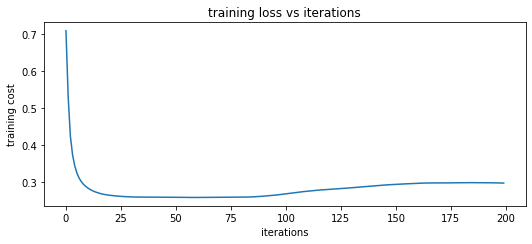

In [ ]:
costs = np.squeeze(cost_with_momentum1_l2regularization)
plt.plot(costs)
plt.ylabel('training cost')
plt.xlabel('iterations')
plt.title("training loss vs iterations")
plt.show()

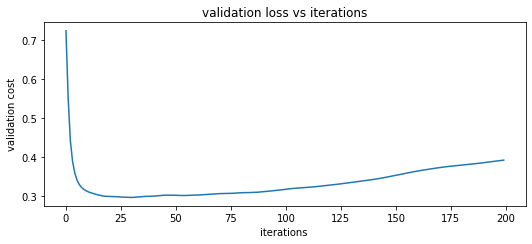

In [ ]:
costs = np.squeeze(cost_with_momentum2_l2regularization)
plt.plot(costs)
plt.ylabel('validation cost')
plt.xlabel('iterations ')
plt.title("validation loss vs iterations")
plt.show()

confusion matrix

In [ ]:
predictions_val = predict(parameters_with_momentum_l2regularization, X_test)
print ('Final test Accuracy: %d' % float((np.dot(Y_test,predictions_val.T) + np.dot(1-Y_test,1-predictions_val.T))/float(Y_test.size)*100) + '%')
n11=0
n12=0
n21=0
n22=0
for i in range(Y_val.shape[1]):
  if(Y_val[0,i]==0 and predictions_test_momentum_l2regularization[0,i]==False):
    n11+=1
  elif(Y_val[0,i]==0 and predictions_test_momentum_l2regularization[0,i]==True):
    n12+=1
  elif(Y_val[0,i]==1 and predictions_test_momentum_l2regularization[0,i]==False):
    n21+=1
  else:
    n22+=1
print(n11,n12,n21,n22)

Final test Accuracy: 91%
110 16 15 122


Performance Estimation on validation set

In [ ]:
predictions_val_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_test)
print ('Validation Accuracy: %d' % float((np.dot(Y_test,predictions_val_momentum_l2regularization.T) + np.dot(1-Y_test,1-predictions_val_momentum_l2regularization.T))/float(Y_test.size)*100) + '%')

Validation Accuracy: 91%


In [ ]:
def compute_cost_with_l1regularization(AL, Y, parameters, lambd):
    m = Y.shape[1]
    L=len(parameters)//2
    cross_entropy_cost = compute_cost(AL, Y,parameters)
    s1=0
    for i in range(1,L+1):
      s1+=np.sum(abs(parameters["W"+str(i)]))
    L1_regularization_cost = lambd/(2*m)*(s1)
    cost = cross_entropy_cost + L1_regularization_cost
    return cost

In [ ]:
def backward_propagation_with_l1regularization(X, Y, AL,cache, parameters,lambd):
      
    m = X.shape[1]
    L=len(parameters)//2
    grads={}
    dZL=AL-Y
    for i in range(L,1,-1):
      dWi=(1./m)*np.dot(dZL,cache["A"+str(i-1)].T)+ (lambd/m)
      dbi=(1./m)*(np.sum(dZL,axis=1,keepdims=True))
      dAi=np.dot(parameters["W"+str(i)].T,dZL)
      grads["dW"+str(i)]=dWi
      grads["db"+str(i)]=dbi
      grads["dZ"+str(i)]=dZL
      grads["dA"+str(i-1)]=dAi
      dZL=np.multiply(dAi,np.int64(cache["A"+str(i-1)]>0))
    dW1=(1./m)*np.dot(dZL,X.T)+ (lambd/m)*parameters["W1"]
    db1 = 1./m * np.sum(dZL, axis=1, keepdims = True)
    grads["dW1"]=dW1
    grads["db1"]=db1
    grads["dZ1"]=dZL
    return grads

In [ ]:
def nn_model_with_momentum_l1regularization(X, Y, X_test,Y_test,layers_dims, beta,lambd,learning_rate, num_iterations = 1000, print_cost=False):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    parameters = initialize_parameters_deep(layers_dims)
    #parameters = initialize_parameters_he(layers_dims)
    costs1=[]
    costs2=[]
    v = initialize_velocity(parameters)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters)
        A_test, cache_test = L_model_forward(X_test, parameters)
        cost1 = compute_cost_with_l1regularization(AL, Y, parameters,lambd)
        cost2=compute_cost_with_l1regularization(A_test,Y_test,parameters,lambd)
        grads = backward_propagation_with_l1regularization(X,Y,AL,cache,parameters, lambd)
        parameters,v = update_parameters_with_momentum(parameters, grads, v,beta,learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost1))
        if(i%10==0):
            costs1.append(cost1)
            costs2.append(cost2)
    return parameters,costs1,costs2

In [ ]:
parameters_with_momentum_l1regularization,cost_with_momentum1_l1regularization,cost_with_momentum2_l1regularization = nn_model_with_momentum_l1regularization(X_train, Y_train, X_val,Y_val,layers,0.8,0.5,0.1,num_iterations=500, print_cost=True)

Cost after iteration 0: 1.528653
Cost after iteration 100: 1.074041
Cost after iteration 200: 1.074694
Cost after iteration 300: 1.079273
Cost after iteration 400: 1.086711


In [ ]:
predictions_train_momentum_l1regularization = predict(parameters_with_momentum_l1regularization, X_train)
predictions_test_momentum_l1regularization = predict(parameters_with_momentum_l1regularization, X_val)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train_momentum_l1regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l1regularization.T))/float(Y_train.size)*100) + '%')
print ('Test Accuracy: %d' % float((np.dot(Y_val,predictions_test_momentum_l1regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l1regularization.T))/float(Y_val.size)*100) + '%')

Train Accuracy: 89%
Test Accuracy: 88%


[84.79087452471484, 88.212927756654, 85.55133079847909, 89.73384030418251, 88.212927756654, 83.26996197718631, 68.44106463878326, 68.06083650190115, 57.414448669201526, 52.09125475285171, 52.09125475285171]


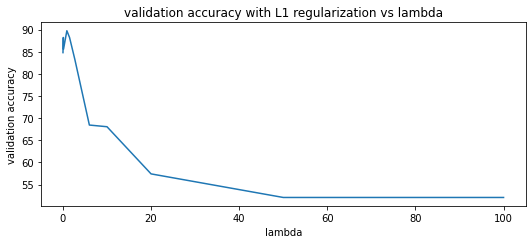

In [ ]:
lambda_l1=[0.01,0.09,0.13,0.89,1.5,2.7,6,10,20,50,100]
acc_l1=[]
for l1 in lambda_l1:
  parameters_with_momentum_l1regularization,cost_with_momentum1_l1regularization,cost_with_momentum2_l1regularization = nn_model_with_momentum_l1regularization(X_train, Y_train, X_val,Y_val,layers,0.8,l1,0.1,num_iterations=2000, print_cost=False)
  predictions_test_momentum_l1regularization = predict(parameters_with_momentum_l1regularization, X_val)
  acc_l1.append(float((np.dot(Y_val,predictions_test_momentum_l1regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l1regularization.T))/float(Y_val.size)*100))
print(acc_l1)
plt.plot(lambda_l1,acc_l1)
plt.ylabel('validation accuracy')
plt.xlabel('lambda')
plt.title("validation accuracy with L1 regularization vs lambda")
plt.show()

# Accuracy with varying number of layers

Train Accuracy for 3 layer: 89%
Validation Accuracy for 3 layer: 90%
Train Accuracy for 4 layer: 89%
Validtaion Accuracy for 4 layer: 87%
Train Accuracy for 5 layer: 88%
Validation Accuracy for 5 layer: 85%
Train Accuracy for 6 layer: 87%
Validation Accuracy for 6 layer: 87%
Train Accuracy for 7 layer: 88%
Validation Accuracy for 7 layer: 90%
Train Accuracy for 8 layer: 87%
Validation Accuracy for 8 layer: 87%
Train Accuracy for  layer: 69%
Validation Accuracy for 9 layer: 66%
Train Accuracy for 8 layer: 88%
Validation Accuracy for 8 layer: 87%


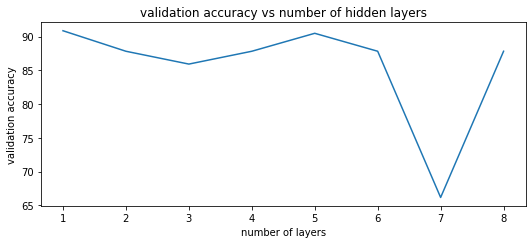

In [ ]:
num_l=[1,2,3,4,5,6,7,8]
acc_l=[]
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,128,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac1=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 3 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 3 layer: %d' % ac1 + '%')
acc_l.append(ac1)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,128,128,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac2=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 4 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validtaion Accuracy for 4 layer: %d' % ac2 + '%')
acc_l.append(ac2)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,128,64,128,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac3=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 5 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 5 layer: %d' % ac3 + '%')
acc_l.append(ac3)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,32,128,32,16,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac4=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 6 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 6 layer: %d' % ac4 + '%')
acc_l.append(ac4)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,32,128,32,16,4,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac5=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 7 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 7 layer: %d' % ac5 + '%')
acc_l.append(ac5)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,32,64,128,256,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac6=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 8 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 8 layer: %d' % ac6 + '%')
acc_l.append(ac6)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,256,128,64,32,16,8,4,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac7=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for  layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 9 layer: %d' % ac7 + '%')
acc_l.append(ac7)
parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,128,128,32,32,32,16,16,4,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
predictions_train_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_train)
predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
ac8=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
print ('Train Accuracy for 8 layer: %d' % float((np.dot(Y_train,predictions_train_momentum_l2regularization.T) + np.dot(1-Y_train,1-predictions_train_momentum_l2regularization.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy for 8 layer: %d' % ac8 + '%')
acc_l.append(ac8)
plt.plot(num_l,acc_l)
plt.ylabel('validation accuracy')
plt.xlabel('number of layers')
plt.title("validation accuracy vs number of hidden layers")
plt.show()

Varying final layer size

In [25]:
num_neuron=[2,32,64,128,256,512]
p1=[]
for n in num_neuron:
  parameters_with_momentum_l2regularization,cost_with_momentum1_l2regularization,cost_with_momentum2_l2regularization = nn_model_with_momentum_l2regularization(X_train, Y_train, X_val,Y_val,[10,32,64,128,n,1],0.8,3,0.1,num_iterations=2000, print_cost=False)
  predictions_test_momentum_l2regularization = predict(parameters_with_momentum_l2regularization, X_val)
  ac1=float((np.dot(Y_val,predictions_test_momentum_l2regularization.T) + np.dot(1-Y_val,1-predictions_test_momentum_l2regularization.T))/float(Y_val.size)*100)
  #print ('Validation Accuracy for %n nodes in final layer: %d' % ac1 + '%')
  print("Validation accuracy for " +str (n)+ " nodes in final layer is " + str(ac1))
  p1.append(ac1)


Validation accuracy for 2 nodes in final layer is 89.35361216730038
Validation accuracy for 32 nodes in final layer is 90.49429657794677
Validation accuracy for 64 nodes in final layer is 86.31178707224335
Validation accuracy for 128 nodes in final layer is 82.12927756653993
Validation accuracy for 256 nodes in final layer is 88.212927756654
Validation accuracy for 512 nodes in final layer is 89.73384030418251


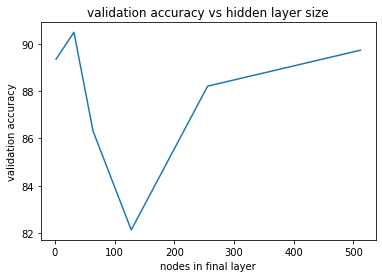

In [29]:
plt.plot(num_neuron,p1)
plt.ylabel('validation accuracy')
plt.xlabel('nodes in final layer')
plt.title("validation accuracy vs hidden layer size")
plt.show()

In [ ]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    
    A = np.maximum(0,Z)
    cache = Z 
    return A, cache


def relu_backward(dA, cache):

    
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ



def initialize_parameters_deep(layer_dims):
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  
    return parameters

def linear_forward(A, W, b):

    Z = W.dot(A) + b
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):

    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):


    caches = []
    A = X
    L = len(parameters) // 2 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)        
    return AL, caches

def compute_cost(AL, Y):

    
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)     
    return cost

def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

def predicts(X, y, parameters):

    
    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))

    probas, caches = L_model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p



In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations = 3000, print_cost=False):#lr was 0.009


    np.random.seed(1)
    costs = []                 

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)

        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = L_layer_model(X_train, Y_train, [X_train.shape[0],32,64,128,256,Y_train.shape[0]], 0.01,num_iterations = 2000, print_cost = True)

In [ ]:
predictions_train = predicts(X_train,Y_train,parameters )
predictions_test = predicts(X_val,Y_val,parameters)
print ('Train Accuracy: %d' % float((np.dot(Y_train,predictions_train.T) + np.dot(1-Y_train,1-predictions_train.T))/float(Y_train.size)*100) + '%')
print ('Validation Accuracy: %d' % float((np.dot(Y_val,predictions_test.T) + np.dot(1-Y_val,1-predictions_test.T))/float(Y_val.size)*100) + '%')

Accuracy: 0.917221693625119
Accuracy: 0.8821292775665399
Train Accuracy: 91%
Validation Accuracy: 88%


Test accuracy on relu activation

In [ ]:
predictions_val = predicts(X_test,Y_test,parameters )
print ('Test Accuracy: %d' % float((np.dot(Y_test,predictions_val.T) + np.dot(1-Y_test,1-predictions_val.T))/float(Y_test.size)*100) + '%')